#### This function will take in a file(2 columns) and convert them into a dictionary to analyse data by the hour

In [1]:
def get_time_bucket(filename):
    """retrieve a file name, and return a dictionary with key(hour), value(time to resolve)"""
    def get_data(filename):
        '''converting the file to a list of items. the first value of each item is the hour, and second value is the averagetime of resolution'''
        import datetime
        data_tuples=list()
        date_format='%Y-%m-%d %H:%M:%S'
        with open(filename,'r') as f:
            for line in f:
                data_tuples.append(line.strip().split(',')) 
                #going line by line to to format the csv file given.
      #  print(data_tuples[1:10]) # to show the first items and be familiar to the list format/avalues        
        data_tuples=[(datetime.datetime.strptime(x[0],date_format).hour,float(x[1]))for x in data_tuples]
        return data_tuples
    buckets=dict()
    for item in get_data(filename): 
        if item[0] in buckets: # item[0] would be the first part of the above example
            buckets[item[0]][0]+=1 # if the "hour" exists then sum how many times it exists in the list
            buckets[item[0]][1]+=item[1] # to sum up the total time for resolution for each hour

        else:
            buckets[item[0]]=[1,item[1]] #if item[0] is not in the dictionary, start the count for it.
    buckets=[(key,value[1]/value[0]) for key, value in buckets.items()]
    return  buckets#key would be 0,1,2... and value would be the average

        
    
   

In [2]:
get_time_bucket('sample_data.csv')

[(0, 0.6570511564469035),
 (1, 2.9613477328431377),
 (2, 2.334965452261305),
 (3, 3.0839338759007866),
 (4, 4.663183017810805),
 (5, 2.550054976851854),
 (6, 5.344349826388891),
 (7, 2.5844597678664565),
 (8, 6.0724520669659565),
 (9, 8.564869090207626),
 (10, 12.671294691132733),
 (11, 5.901653566341063),
 (12, 13.66402543540564),
 (13, 8.593492462013293),
 (14, 8.100135135135135),
 (15, 12.776634463154863),
 (16, 10.943701434277418),
 (17, 6.634365784623489),
 (18, 7.324956692612944),
 (19, 9.098796085858586),
 (20, 5.199433822667603),
 (21, 4.74319171267541),
 (22, 8.449229102956167),
 (23, 5.184938602292768)]

In [3]:
## Applying Bar Plot
def plotting_buckets(filename):
    import matplotlib.pylab as plt 
    %matplotlib inline
    hr_bucket=list()
    res_time=list()
    for item in get_time_bucket(filename):
        hr_bucket.append(item[0])
        res_time.append(item[1])
    #return hr_bucket, res_time    
    fig=plt.figure()
    plt.bar(hr_bucket,res_time)
    plt.xlabel("Hour")
    plt.ylabel("Resolution Time")
    fig.suptitle('Time of Day Vs Resolution Time')


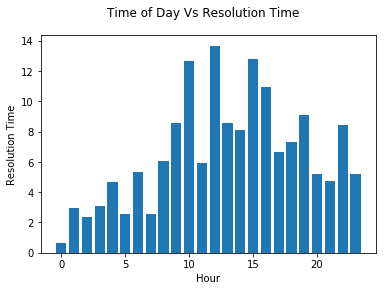

In [4]:
plotting_buckets('sample_data.csv')